# ML: Supervised Learning   

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

/home/muha/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/muha/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/muha/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
# pip install XXXXX

## Task

**TLDR**: We have some measurements from the telescope and we need to classify the astronomical objects

## Dataset

In [4]:
ls data

Skyserver_12_30_2019 4_49_58 PM.csv


In [5]:
# Our dataset
df = pd.read_csv('data/Skyserver_12_30_2019 4_49_58 PM.csv')

In [6]:
# Let's explore it
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,GALAXY,0.020701,2515,54180,363
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,GALAXY,0.130948,2498,54169,609
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,GALAXY,0.004703,2500,54178,84
8,1237669517979620000,2.117128,7.663761,17.82389,16.75859,16.30879,16.13584,16.07477,5598,301,4,129,12733034184836400000,STAR,-0.000355,11309,58428,844
9,1237658423557820000,169.129790,7.152575,17.47752,16.23605,15.61560,15.29749,15.03419,3015,301,3,367,1820656067877560000,GALAXY,0.037549,1617,53112,276


In [7]:
# How many columns we have?
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
# Store columns in a list, might will be helpful later
cols = list(df.columns)
cols

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'class',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

In total, we have 16 variables (numerical values) and 1 additional variable (categorical values) 'class'.

Variables description:
* objid = Object Identifier
* ra = J2000 Right Ascension (r-band)
* dec = J2000 Declination (r-band)
* u = better of deV/Exp magnitude fit (u-band)
* g = better of deV/Exp magnitude fit (g-band)
* r = better of deV/Exp magnitude fit (r-band)
* i = better of deV/Exp magnitude fit (i-band)
* z = better of deV/Exp magnitude fit (z-band)
* run = Run Number
* rerun = Rerun Number
* camcol = Camera column
* field = Field number
* specobjid = Object Identifier
* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiberID 
* **class** = object class (galaxy, star or quasar object)


Comments:

   A four-color UVGR intermediate-band photometric system (Thuan-Gunn astronomic magnitude system) is discussed in [1]. The Sloan Digital Sky Survey (SDSS) photometric system, a new five-color (u′ g′ r′ i′ z′) wide-band CCD system is described in [2].
   
   The variables 'run', 'rerun', 'camcol' and 'field' features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by: - run number, which identifies the specific scan, - the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs. - An additional number, rerun, specifies how the image was processed.
   
   The variable **'class'** identifies an object to be either a galaxy (**GALAXY**), star (**STAR**) or quasar (**QSO**).


### So, classify into which classes?

In [9]:
# Our labels
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

Our data is labeled, we have 3 classes (types) of astronomical objects:
* STAR  
* GALAXY  
* QSO  



**A class object can be predicted from the other 16 variables!**

In [10]:
# Let's see how the classes are distributed 
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

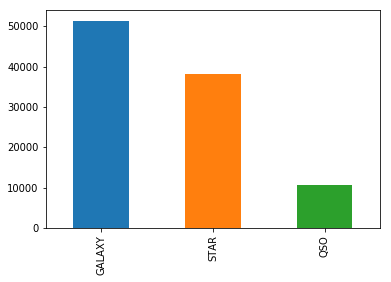

In [11]:
# Visualization with Matplotlib
df['class'].value_counts().plot(kind='bar')

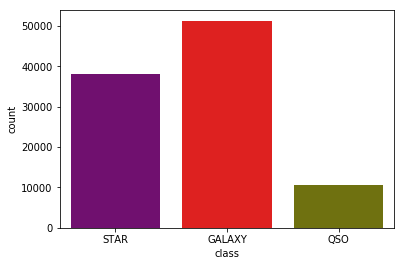

In [12]:
# Visualization with Seaborn
sns.countplot(x='class', data=df, palette="brg")
plt.show()

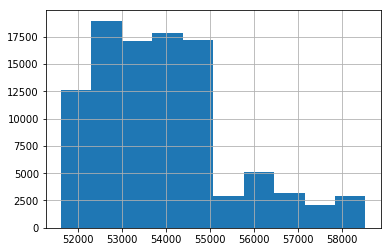

In [13]:
df['mjd'].hist()

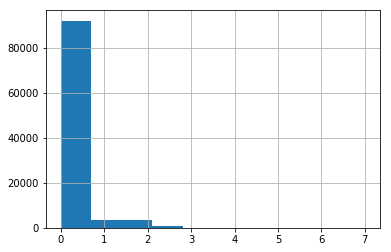

In [14]:
df['redshift'].hist()

### Data preprocessing
We need to prepare our data for machine learning algorithms

In [15]:
# Let's find missing values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

**MO**: for simplicity, the dataset is selected with no missing values.  
Also, it contains no categorical values to handle and transform, only numerical.   
We will come back to the complex data preprocessing issues later when releases the exam tasks.

### Encoding class labels
   For some cases, we cannot simply provide categorical values (just strings). Instead, we can convert them to numerical values.   
   For example, since we have 3 classes, we able to assign to each class some values, so that:  
   * 0 is for GALAXY
   * 1 is for QSO
   * 2 is for STAR.   
   
Makes sense?

In [16]:
# Mapping classes to 0,1,2 values
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}
class_mapping

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}

In [17]:
df['class'] = df['class'].map(class_mapping)
df

# now we see class column with numerical (0,1,2) values

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,2,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,2,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,2,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,0,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,0,0.072210,2123,53793,74
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,0,0.020701,2515,54180,363
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,0,0.130948,2498,54169,609
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,0,0.004703,2500,54178,84
8,1237669517979620000,2.117128,7.663761,17.82389,16.75859,16.30879,16.13584,16.07477,5598,301,4,129,12733034184836400000,2,-0.000355,11309,58428,844
9,1237658423557820000,169.129790,7.152575,17.47752,16.23605,15.61560,15.29749,15.03419,3015,301,3,367,1820656067877560000,0,0.037549,1617,53112,276


In [18]:
# Invariant back to original
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['class'] = df['class'].map(inv_class_mapping)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,GALAXY,0.020701,2515,54180,363
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,GALAXY,0.130948,2498,54169,609
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,GALAXY,0.004703,2500,54178,84
8,1237669517979620000,2.117128,7.663761,17.82389,16.75859,16.30879,16.13584,16.07477,5598,301,4,129,12733034184836400000,STAR,-0.000355,11309,58428,844
9,1237658423557820000,169.129790,7.152575,17.47752,16.23605,15.61560,15.29749,15.03419,3015,301,3,367,1820656067877560000,GALAXY,0.037549,1617,53112,276


In [19]:
# Labels encoding with special Scikit Learn function
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
y

array([2, 2, 2, ..., 0, 0, 2])

In [20]:
print('We have {} values'.format(len(y)))

We have 100000 values


## ML models

In [21]:
# Our target which we already encoded
y

array([2, 2, 2, ..., 0, 0, 2])

In [22]:
len(y)

100000

In [23]:
# We prepare data on which we will train and test
# Labels column should be excluded
df = df.drop(columns=['class'])
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,0.072210,2123,53793,74
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,0.020701,2515,54180,363
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,0.130948,2498,54169,609
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,0.004703,2500,54178,84
8,1237669517979620000,2.117128,7.663761,17.82389,16.75859,16.30879,16.13584,16.07477,5598,301,4,129,12733034184836400000,-0.000355,11309,58428,844
9,1237658423557820000,169.129790,7.152575,17.47752,16.23605,15.61560,15.29749,15.03419,3015,301,3,367,1820656067877560000,0.037549,1617,53112,276


In [24]:
# We need to normalize the data, to not have bias of huge values

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [25]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.588621,0.131559,0.195373,0.899044,0.723329,0.328493,0.321908,0.353720,0.588601,0.0,0.8,0.782698,0.611102,0.000606,0.611087,0.719394,0.831832
1,0.802707,0.323040,0.595767,0.874989,0.739479,0.358321,0.364031,0.412183,0.802682,0.0,1.0,0.215242,0.701599,0.000576,0.701583,0.829993,0.867868
2,0.728126,0.479861,0.102992,0.652563,0.546334,0.285167,0.295095,0.336511,0.728176,0.0,0.0,0.002060,0.226895,0.000613,0.226895,0.428983,0.041041
3,0.563754,0.558941,0.464166,0.892710,0.698618,0.308597,0.294571,0.317437,0.563765,0.0,0.4,0.113285,0.151788,0.008879,0.151788,0.268637,0.034034
4,0.563754,0.591145,0.443528,0.920262,0.795059,0.368294,0.357446,0.396583,0.563765,0.0,0.4,0.185376,0.162369,0.010883,0.162368,0.315068,0.073073


### Split the data into train and test

In [26]:
X = df
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.588621,0.131559,0.195373,0.899044,0.723329,0.328493,0.321908,0.353720,0.588601,0.0,0.8,0.782698,0.611102,0.000606,0.611087,0.719394,0.831832
1,0.802707,0.323040,0.595767,0.874989,0.739479,0.358321,0.364031,0.412183,0.802682,0.0,1.0,0.215242,0.701599,0.000576,0.701583,0.829993,0.867868
2,0.728126,0.479861,0.102992,0.652563,0.546334,0.285167,0.295095,0.336511,0.728176,0.0,0.0,0.002060,0.226895,0.000613,0.226895,0.428983,0.041041
3,0.563754,0.558941,0.464166,0.892710,0.698618,0.308597,0.294571,0.317437,0.563765,0.0,0.4,0.113285,0.151788,0.008879,0.151788,0.268637,0.034034
4,0.563754,0.591145,0.443528,0.920262,0.795059,0.368294,0.357446,0.396583,0.563765,0.0,0.4,0.185376,0.162369,0.010883,0.162368,0.315068,0.073073
5,0.646251,0.495356,0.387044,0.537930,0.408437,0.176834,0.164785,0.170118,0.646219,0.0,1.0,0.117405,0.196650,0.003540,0.196642,0.370872,0.362362
6,0.646251,0.479419,0.385131,0.944379,0.720551,0.306825,0.291310,0.309231,0.646219,0.0,1.0,0.080330,0.195168,0.019255,0.195156,0.369286,0.608609
7,0.646251,0.478618,0.385404,0.698621,0.641872,0.315632,0.344091,0.382783,0.646219,0.0,1.0,0.078270,0.195332,0.001260,0.195331,0.370584,0.083083
8,0.681609,0.005845,0.261182,0.802400,0.686527,0.317757,0.312859,0.348747,0.681609,0.0,0.6,0.121524,0.965565,0.000539,0.965550,0.983417,0.843844
9,0.360859,0.469786,0.256266,0.763863,0.635931,0.287599,0.276867,0.297828,0.360859,0.0,0.4,0.366632,0.118131,0.005942,0.118125,0.216871,0.275275


In [27]:
y

array([2, 2, 2, ..., 0, 0, 2])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [29]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
78689,0.629953,0.367508,0.325542,0.904862,0.754886,0.342696,0.329850,0.360350,0.629952,0.0,0.6,0.112255,0.189218,0.010345,0.189210,0.318241,0.381381
76423,0.965061,0.000815,0.132501,0.927037,0.760597,0.346562,0.340552,0.378037,0.965106,0.0,0.2,0.013388,0.206178,0.000595,0.206173,0.399712,0.294294
86945,0.264982,0.478146,0.750662,0.414007,0.358226,0.154598,0.149306,0.148304,0.264994,0.0,0.2,0.289392,0.059894,0.002080,0.059893,0.113915,0.023023
57427,0.469896,0.528344,0.597278,0.967067,0.722116,0.311421,0.295420,0.314174,0.469887,0.0,0.6,0.195675,0.104055,0.016004,0.104048,0.217304,0.322322
34616,0.554691,0.655861,0.411627,0.796936,0.673173,0.311395,0.302032,0.328231,0.554700,0.0,0.4,0.764161,0.166398,0.005624,0.166390,0.280894,0.393393
28038,0.139321,0.537504,0.157632,0.949359,0.803178,0.364431,0.350238,0.384668,0.139327,0.0,0.2,0.155510,0.006211,0.012641,0.006208,0.056092,0.144144
7054,0.554675,0.438164,0.486068,0.677912,0.682707,0.325135,0.305054,0.351214,0.554700,0.0,0.2,0.291452,0.891316,0.026019,0.891318,0.944917,0.060060
90967,0.472985,0.645801,0.584449,0.913733,0.765335,0.379042,0.385553,0.436861,0.472991,0.0,0.4,0.226571,0.123556,0.000514,0.123546,0.222206,0.479479
30739,0.469850,0.540100,0.583939,0.936375,0.826245,0.387056,0.385111,0.435180,0.469887,0.0,0.0,0.217302,0.388047,0.000497,0.388039,0.587311,0.469469
41691,0.566828,0.627358,0.382751,0.911217,0.737811,0.321546,0.303057,0.321999,0.566869,0.0,0.0,0.144181,0.220869,0.013270,0.220862,0.425090,0.367367


## Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=49)

model_dtc.fit(X_train, y_train)

accuracies = {}

acc = model_dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 98.45%


## Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # default parameters

model_lr.fit(X_train,y_train)

y_pred = model_lr.predict(X_test)

acc = model_lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.34%


In [32]:
y_pred

array([2, 2, 2, ..., 0, 0, 0])

In [33]:
y_test

array([0, 2, 2, ..., 0, 0, 0])

### Confusion matrix

<img src="./pics/errormatrix.jpg" style="width:350px;">

### Precision-Recall

<img src="./pics/accuracy.jpg" style="width:500px;">

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = model_lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = model_lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.92      0.89     10253
          1       0.99      0.88      0.93      2124
          2       0.88      0.84      0.86      7623

avg / total       0.89      0.88      0.88     20000

Confusion Matrix: 
 [[9398   11  844]
 [ 233 1859   32]
 [1211    1 6411]]
Training Score:  0.8827875
Testing Score:  0.8834


### Support vector machines

<img src="./pics/SVM.png" style="width:350px;">

In [35]:
from sklearn.svm import SVC

model_svm = SVC(random_state = 1)

model_svm.fit(X_train, y_train)

acc = model_svm.score(X_test,y_test)*100

accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.67%


### Naive Bayes

<img src="./pics/NB.png" style="width:500px;">

In [36]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

acc = model_nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 97.31%


In [37]:
y_pred = model_nb.predict(X_test)

In [38]:
y_pred

array([0, 2, 2, ..., 0, 0, 0])

In [39]:
y_test

array([0, 2, 2, ..., 0, 0, 0])

In [40]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = model_lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = model_lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
              precision    recall  f1-score   support

          0       0.98      0.97      0.98     10253
          1       0.89      0.93      0.91      2124
          2       0.99      0.98      0.99      7623

avg / total       0.97      0.97      0.97     20000

Confusion Matrix: 
 [[9992  185   76]
 [ 148 1975    1]
 [  67   60 7496]]
Training Score:  0.8827875
Testing Score:  0.8834


### KNN Neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
model_knn.fit(X_train, y_train)
prediction = model_knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(3, model_knn.score(X_test, y_test)*100))

3 NN Score: 88.28%


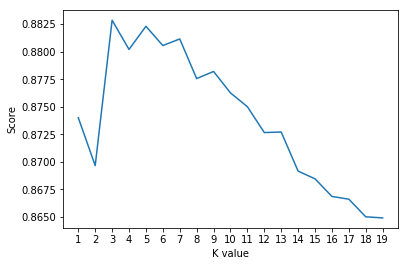

Maximum KNN Score is 88.28%


In [43]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

#### References:

* **Dataset (on Kaggle)**  
  Sloan Digital Sky Survey DR16 Server Data with Galaxies, Stars and Quasars](https://www.kaggle.com/muhakabartay/sloan-digital-sky-survey-dr16), holder: Mukharbek Organokov

    The **Sloan Digital Sky Survey (SDSS)** has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one-third of the sky, and spectra for more than three million astronomical objects. It allows to learn and explore all phases and surveys - past, present, and future - of the SDSS.
    
    
* **SDSS  telescope**      
  [1] [Thuan & Gunn (1976, PASP, 88,543)](https://iopscience.iop.org/article/10.1086/129982)  
  [2] [Fukugita, M. et al, Astronomical J. v.111, p.1748](http://adsabs.harvard.edu/full/1996AJ....111.1748F)  
  
  
* **Materials used**  
  [3] [Python Machine Learning - 3rd edition](https://sebastianraschka.com/books.html) by Sebastian Raschka , Vahid Mirjalili (2020)